# 1. Installing all the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. loading the dataset from sklearn

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
type(housing)

sklearn.utils._bunch.Bunch

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


# 3. Preparation of Data

In [11]:
dataset = pd.DataFrame(housing.data, columns = housing.feature_names)

In [12]:
type(dataset)

pandas.core.frame.DataFrame

In [13]:
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
dataset['Price'] = housing.target

In [15]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

# 4. EDA - Exploratory data analysis

In [20]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [21]:
# Avg rooms and Avg Bedrooms : 0.847621
# Longitude and Latitude : -0.924664

dataset.drop('AveRooms', axis = 1, inplace = True)
dataset.drop('Longitude', axis = 1, inplace = True)

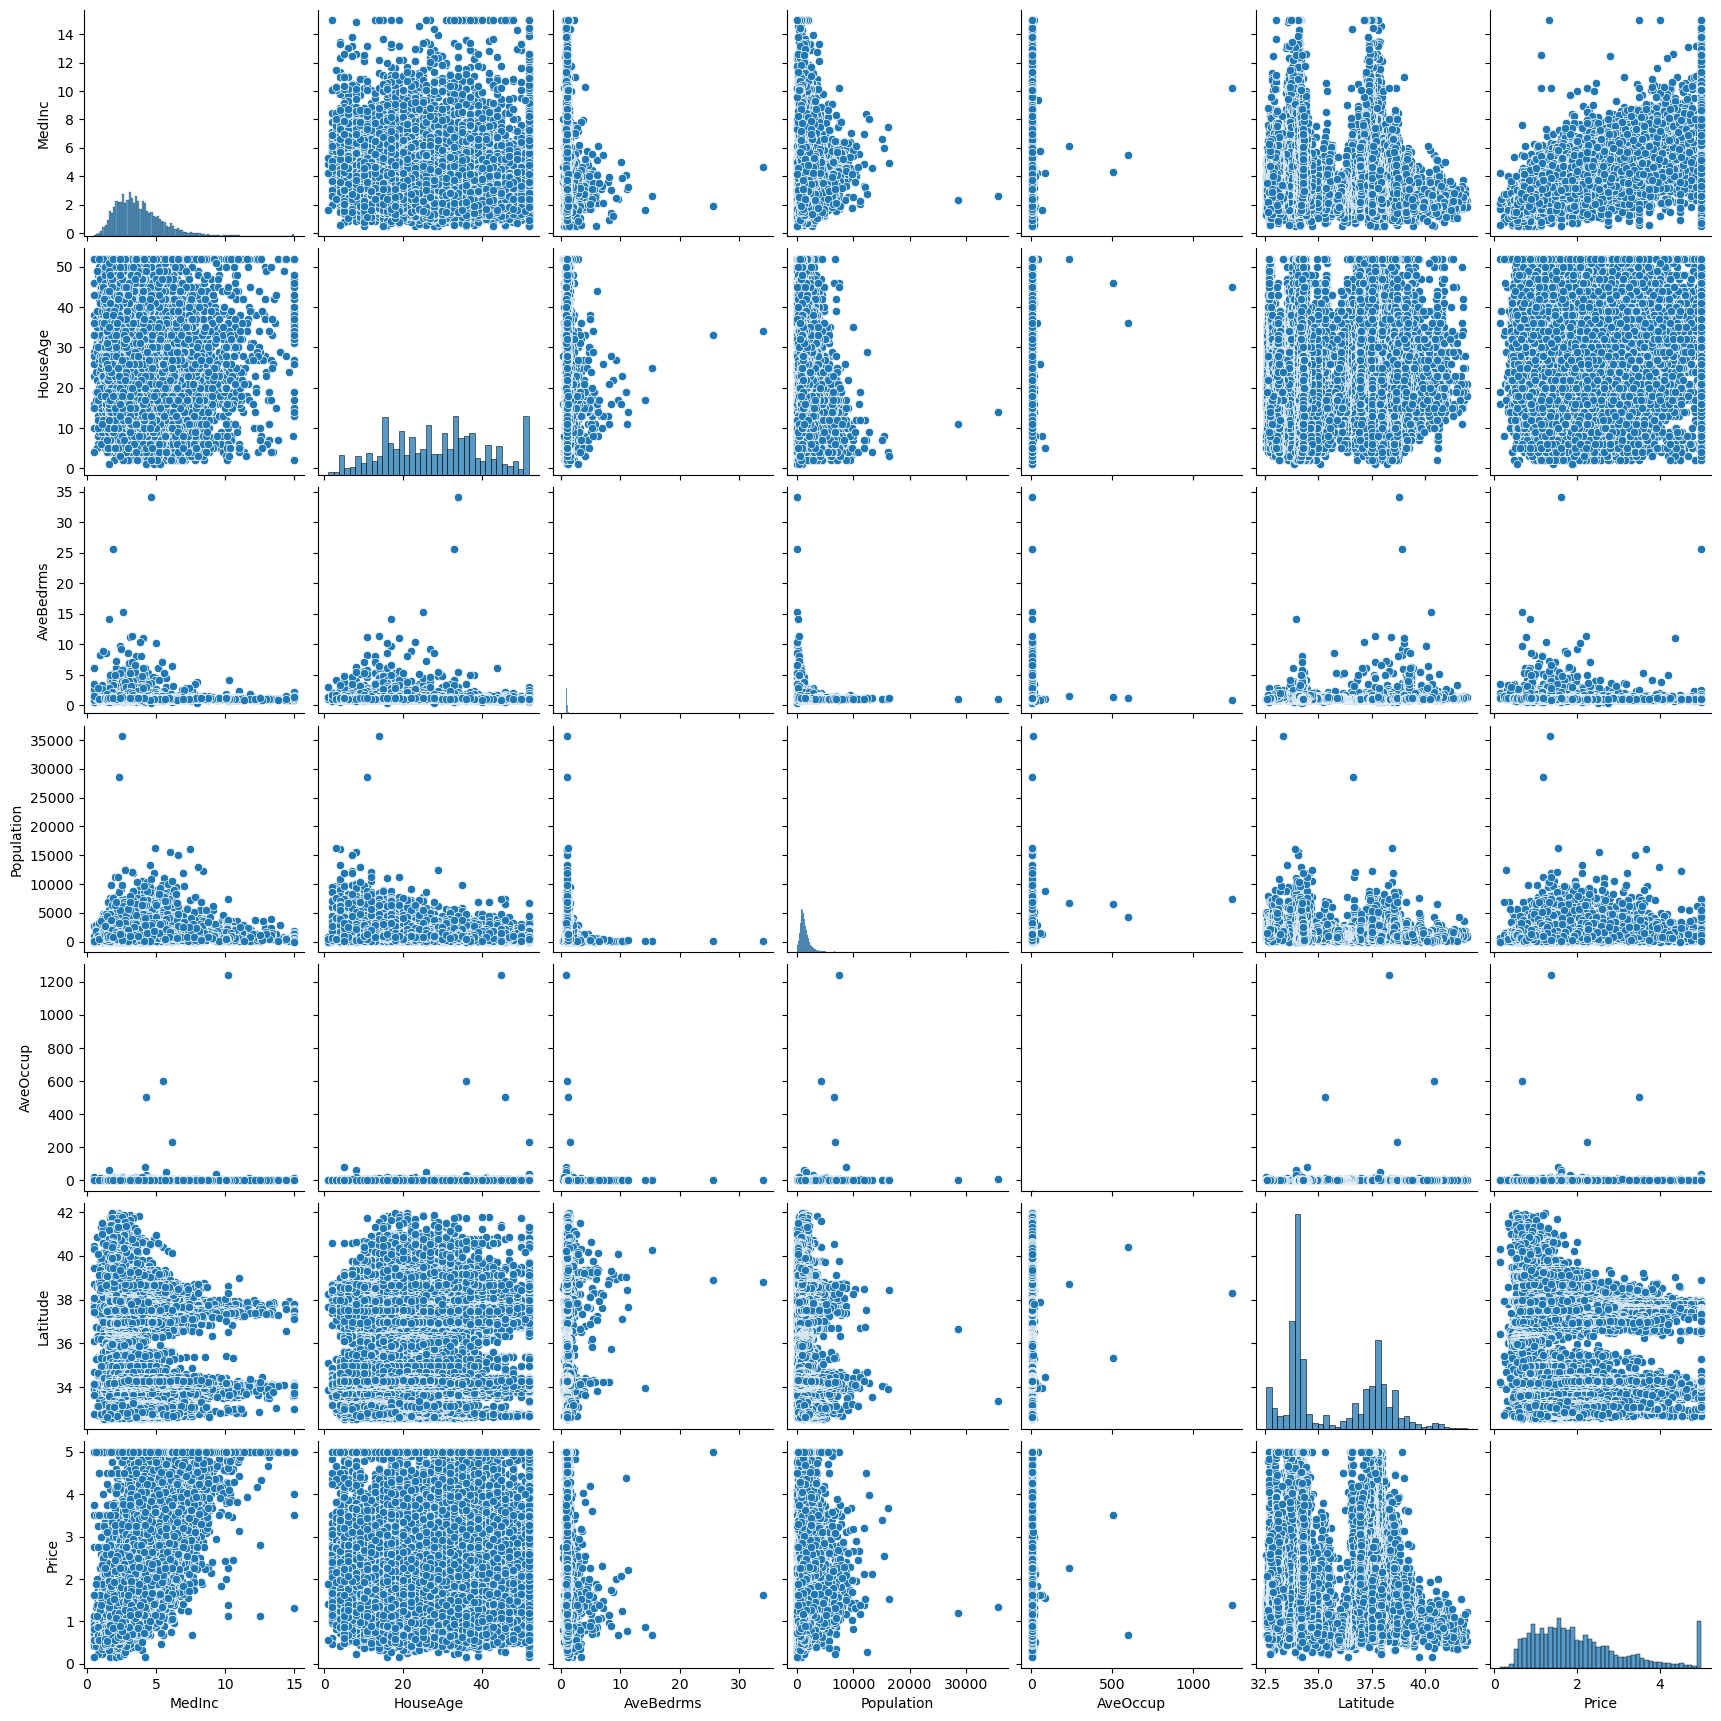

In [22]:
sns.pairplot(dataset)

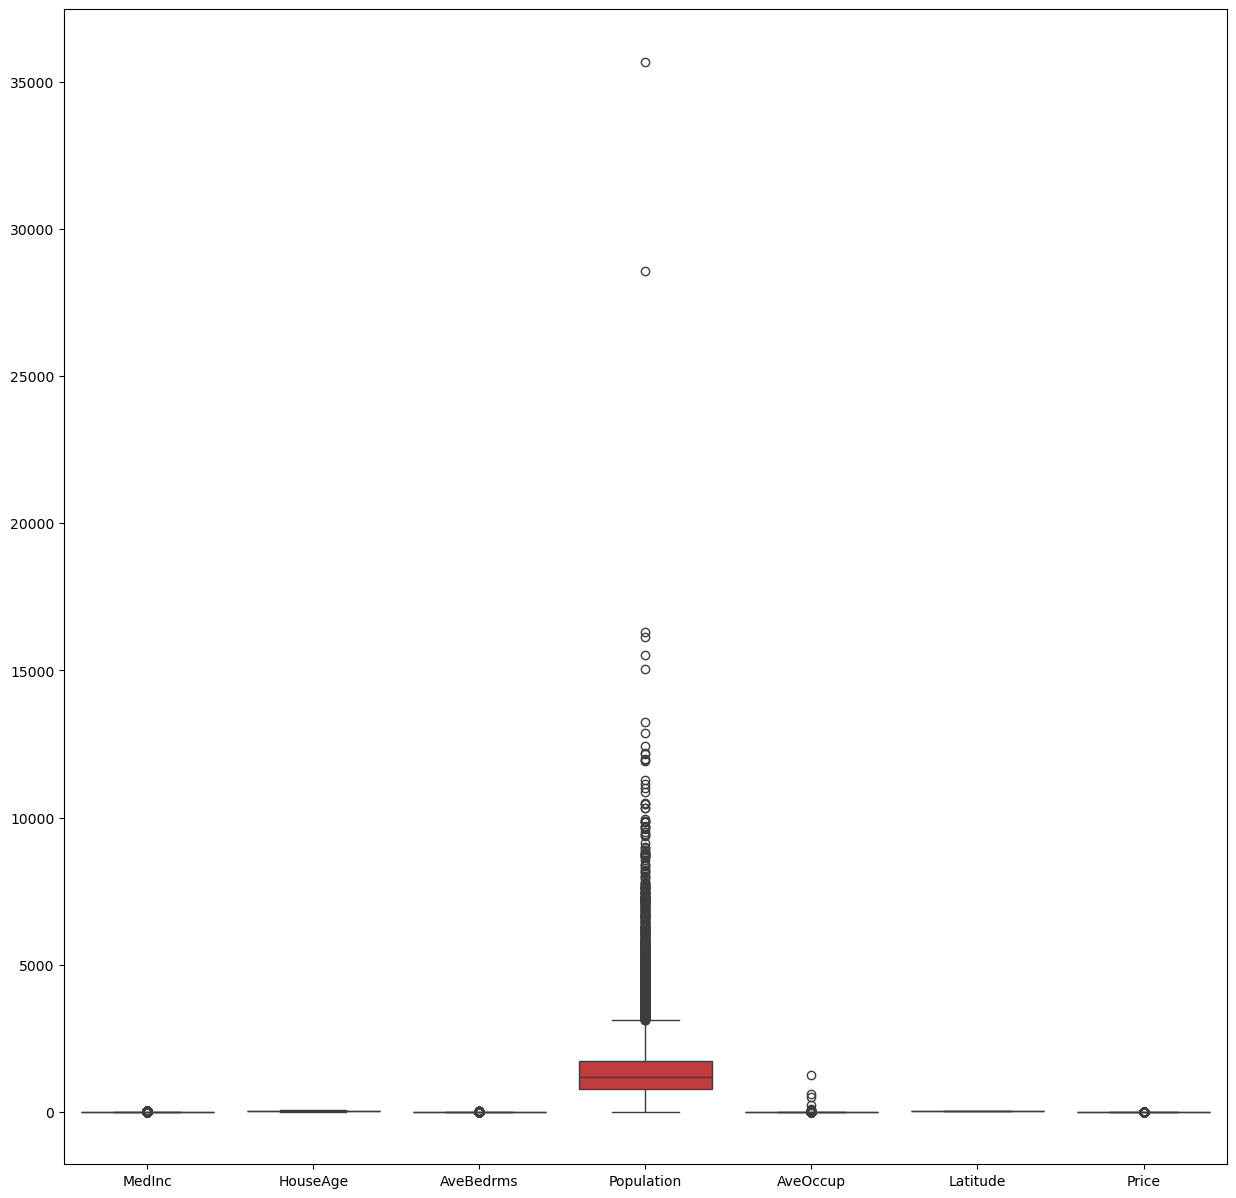

In [23]:
# Using Boxplot -  to detect outliers 

fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = dataset, ax = ax)
plt.savefig("boxPlot.png")

In [24]:
# We need to normalize the values of population as it contains huge values and can
# have a negative influence on our model

## Normalising using Standard scaler (mean = 0, std dev = 1)

In [25]:
#Spltting the data into independent and dependent features
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [26]:
x

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,1.171920,741.0,2.123209,39.43


In [27]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [28]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42) 

In [29]:
x_train

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude
7061,4.1312,35.0,0.975490,1218.0,2.985294,33.93
14689,2.8631,20.0,1.076613,999.0,2.014113,32.79
17323,4.2026,24.0,0.989474,731.0,2.564912,34.59
10056,3.1094,14.0,1.094203,302.0,2.188406,39.26
15750,3.3068,52.0,1.066265,1526.0,2.298193,37.77
...,...,...,...,...,...,...
11284,6.3700,35.0,0.926267,658.0,3.032258,33.78
11964,3.0500,33.0,1.269488,1753.0,3.904232,34.02
5390,2.9344,36.0,1.079696,1756.0,3.332068,34.03
860,5.7192,15.0,1.067979,1777.0,3.178891,37.58


In [30]:
x_test

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude
20046,1.6812,25.0,1.022284,1392.0,3.877437,36.06
3024,2.5313,30.0,1.193493,1565.0,2.679795,35.14
15663,3.4801,52.0,1.185877,1310.0,1.360332,37.80
20484,5.7376,17.0,1.020202,1705.0,3.444444,34.28
9814,3.7250,34.0,1.028037,1063.0,2.483645,36.62
...,...,...,...,...,...,...
17505,2.9545,47.0,1.020833,581.0,2.420833,37.36
13512,1.4891,41.0,1.118519,994.0,3.681481,34.11
10842,3.5120,16.0,1.075614,5014.0,2.369565,33.67
16559,3.6500,10.0,1.060371,5935.0,3.547519,37.82


In [31]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: Price, Length: 6192, dtype: float64

In [32]:
## Normalisation of data points

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)

In [33]:
x_train_norm

array([[ 0.13350629,  0.50935748, -0.27384968, -0.18411678, -0.01082519,
        -0.80568191],
       [-0.53221805, -0.67987313, -0.04786832, -0.37619075, -0.08931585,
        -1.33947268],
       [ 0.1709897 , -0.36274497, -0.24260044, -0.61124018, -0.04480037,
        -0.49664515],
       ...,
       [-0.49478713,  0.58863952, -0.04097756,  0.28773617,  0.01720102,
        -0.75885816],
       [ 0.96717102, -1.07628333, -0.06716375,  0.30615422,  0.00482125,
         0.90338501],
       [-0.68320166,  1.85715216, -0.0877285 ,  1.0446304 , -0.0816717 ,
         0.99235014]])

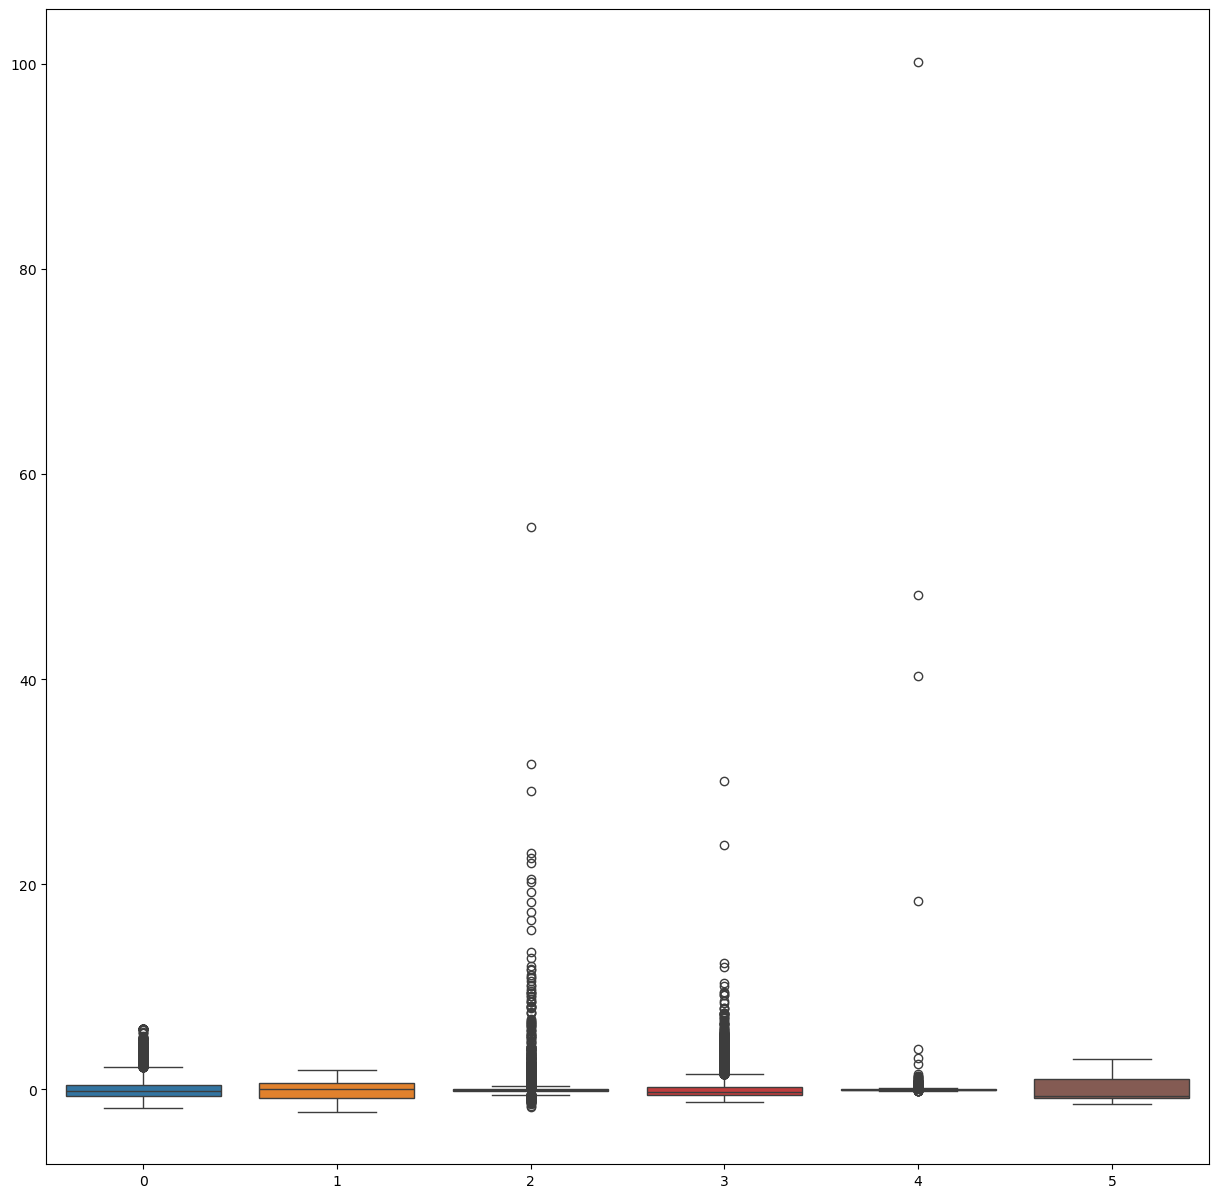

In [34]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = x_train_norm, ax = ax)
plt.savefig("boxPlot.png")

### Why do we fit_transform the training data but only transform our testing data.
1. fit_transform for Training Data
What It Does: fit_transform does two things:

Fits: It computes the required parameters from the training data (e.g., mean and standard deviation for standardization, or min and max for normalization).
Transforms: It applies the transformation to the training data based on the computed parameters.
Why Only on Training Data:

Machine learning models should not have access to the test data during training. If you compute the parameters (like mean or standard deviation) from both training and test data, it can lead to data leakage and overly optimistic performance estimates.
fit_transform ensures that the transformation is based solely on the training data.
2. transform for Testing Data

What It Does: transform applies the transformation to the test data using the parameters learned from the training data during the fit step.

Why Only Transform:

The test data should be treated as unseen data. Using the parameters (e.g., the mean and standard deviation) derived from the training data ensures that the test data is scaled or transformed in the same way as the training data.
This maintains consistency and avoids introducing information from the test data into the model.

In [36]:
x_test_norm = scaler.transform(x_test)

# 4. Model Training

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_norm,y_train)

LinearRegression()

In [39]:
print(regression.coef_)

[ 0.81970663  0.23317641  0.03202161  0.03262388 -0.04994069 -0.10105329]


In [40]:
print(regression.intercept_)

2.0692396089424143


# 5. Model Prediction

In [42]:
pred = regression.predict(x_test_norm)
pred

array([1.02939861, 1.55322091, 2.23984464, ..., 1.87748772, 1.65009451,
       1.64462508])

In [43]:
## calculating the error or the residual
residuals = y_test - pred

In [44]:
residuals

20046   -0.552399
3024    -1.095221
15663    2.760165
20484   -0.535865
9814     0.734591
           ...   
17505    0.469899
13512   -0.658077
10842    0.306512
16559   -0.456095
5786     0.453375
Name: Price, Length: 6192, dtype: float64

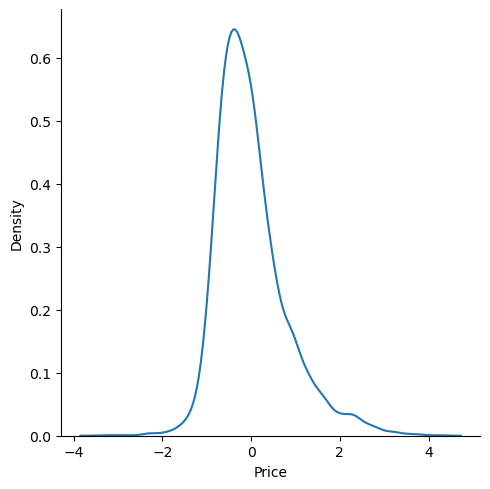

In [45]:
## Distribution plots of the residuals

sns.displot(residuals,kind = "kde")

# 6. Model Performance

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.6323536467945773
0.5936344907220686
0.5182214676488546
0.7952066692342169


In [48]:
score = r2_score(y_test,pred)
score

0.5182214676488546

Adjusted R- square

In [50]:
1 - (1-score)*(len(y_test)-1)/(len(y_test) - x_test_norm.shape[1]-1)

0.5177540996304056

# 7 . Save the Model -> Pickle file

In [52]:
import pickle
pickle.dump(regression, open('LinearRegression.pkl','wb'))

# 8. Load the file and perform predictions

In [54]:
model = pickle.load(open('LinearRegression.pkl','rb'))

In [55]:
# model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

In [56]:
0.5305677824766752
0.5272474538305952
0.5957702326061665
0.7284008391515452

0.7284008391515452